In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import mpl_toolkits
import seaborn as sns
%matplotlib inline

In [2]:
# Load Dataset — Data Understanding
df_raw = pd.read_csv('Supply_Chain_Shipment_Pricing_Data.csv', delimiter = ',')
df_raw

,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN
5,23,112-NG-T01,Pre-PQ Process,SCMS-87,ASN-57,Nigeria,PMO - US,Direct Drop,EXW,Air,...,240,416,2225.60,5.35,0.02,"Aurobindo Unit III, India",True,504,5920.42,NaN
6,44,110-ZM-T01,Pre-PQ Process,SCMS-139,ASN-130,Zambia,PMO - US,Direct Drop,DDU,Air,...,90,135,4374.00,32.40,0.36,MSD South Granville Australia,True,328,Freight Included in Commodity Cost,NaN
7,45,109-TZ-T01,Pre-PQ Process,SCMS-140,ASN-94,Tanzania,PMO - US,Direct Drop,EXW,Air,...,60,16667,60834.55,3.65,0.06,"Aurobindo Unit III, India",True,1478,6212.41,NaN
8,46,112-NG-T01,Pre-PQ Process,SCMS-156,ASN-93,Nigeria,PMO - US,Direct Drop,EXW,Air,...,60,273,532.35,1.95,0.03,"Aurobindo Unit III, India",False,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,47,110-ZM-T01,Pre-PQ Process,SCMS-165,ASN-199,Zambia,PMO - US,Direct Drop,CIP,Air,...,120,2800,115080.00,41.10,0.34,ABBVIE (Abbott) St. P'burg USA,True,643,Freight Included in Commodity Cost,NaN


In [3]:
df = df_raw[['country','fulfill via','vendor inco term','shipment mode','product group','sub classification','brand','unit of measure (per pack)','line item quantity','line item value','pack price','unit price','weight (kilograms)', 'freight cost (usd)', 'line item insurance (usd)']]
df.head(10)

,country,fulfill via,vendor inco term,shipment mode,product group,sub classification,brand,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd)
0,Côte d'Ivoire,Direct Drop,EXW,Air,HRDT,HIV test,Reveal,30,19,551.00,29.00,0.97,13,780.34,NaN
1,Vietnam,Direct Drop,EXW,Air,ARV,Pediatric,Generic,240,1000,6200.00,6.20,0.03,358,4521.5,NaN
2,Côte d'Ivoire,Direct Drop,FCA,Air,HRDT,HIV test,Determine,100,500,40000.00,80.00,0.80,171,1653.78,NaN
3,Vietnam,Direct Drop,EXW,Air,ARV,Adult,Generic,60,31920,127360.80,3.99,0.07,1855,16007.06,NaN
4,Vietnam,Direct Drop,EXW,Air,ARV,Adult,Generic,60,38000,121600.00,3.20,0.05,7590,45450.08,NaN
5,Nigeria,Direct Drop,EXW,Air,ARV,Pediatric,Generic,240,416,2225.60,5.35,0.02,504,5920.42,NaN
6,Zambia,Direct Drop,DDU,Air,ARV,Pediatric,Stocrin/Sustiva,90,135,4374.00,32.40,0.36,328,Freight Included in Commodity Cost,NaN
7,Tanzania,Direct Drop,EXW,Air,ARV,Adult,Generic,60,16667,60834.55,3.65,0.06,1478,6212.41,NaN
8,Nigeria,Direct Drop,EXW,Air,ARV,Adult,Generic,60,273,532.35,1.95,0.03,See ASN-93 (ID#:1281),See ASN-93 (ID#:1281),NaN
9,Zambia,Direct Drop,CIP,Air,ARV,Adult,Aluvia,120,2800,115080.00,41.10,0.34,643,Freight Included in Commodity Cost,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 15 columns):
country                       10324 non-null object
fulfill via                   10324 non-null object
vendor inco term              10324 non-null object
shipment mode                 9964 non-null object
product group                 10324 non-null object
sub classification            10324 non-null object
brand                         10324 non-null object
unit of measure (per pack)    10324 non-null int64
line item quantity            10324 non-null int64
line item value               10324 non-null float64
pack price                    10324 non-null float64
unit price                    10324 non-null float64
weight (kilograms)            10324 non-null object
freight cost (usd)            10324 non-null object
line item insurance (usd)     10037 non-null float64
dtypes: float64(4), int64(2), object(9)
memory usage: 1.2+ MB


In [5]:
df['freight cost (usd)'] = pd.to_numeric(df['freight cost (usd)'], errors='coerce')
df['weight (kilograms)'] = pd.to_numeric(df['weight (kilograms)'], errors='coerce')

C:\Users\housh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\housh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 15 columns):
country                       10324 non-null object
fulfill via                   10324 non-null object
vendor inco term              10324 non-null object
shipment mode                 9964 non-null object
product group                 10324 non-null object
sub classification            10324 non-null object
brand                         10324 non-null object
unit of measure (per pack)    10324 non-null int64
line item quantity            10324 non-null int64
line item value               10324 non-null float64
pack price                    10324 non-null float64
unit price                    10324 non-null float64
weight (kilograms)            6372 non-null float64
freight cost (usd)            6198 non-null float64
line item insurance (usd)     10037 non-null float64
dtypes: float64(6), int64(2), object(7)
memory usage: 1.2+ MB


In [7]:
# Descriptive Stats — Data Understanding
df.isnull().mean().sort_values(ascending=False)*100

freight cost (usd)            39.965130
weight (kilograms)            38.279737
shipment mode                  3.487021
line item insurance (usd)      2.779930
unit price                     0.000000
pack price                     0.000000
line item value                0.000000
line item quantity             0.000000
unit of measure (per pack)     0.000000
brand                          0.000000
sub classification             0.000000
product group                  0.000000
vendor inco term               0.000000
fulfill via                    0.000000
country                        0.000000
dtype: float64

In [8]:
df = df[np.isfinite(df['freight cost (usd)'])]
df = df[np.isfinite(df['line item insurance (usd)'])]
df = df[np.isfinite(df['weight (kilograms)'])]
df = df.dropna(axis=0, subset=['shipment mode'])
df

,country,fulfill via,vendor inco term,shipment mode,product group,sub classification,brand,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd)
19,Nigeria,Direct Drop,EXW,Air,HRDT,HIV test,Determine,100,1000,80000.00,80.00,0.80,341.0,2682.47,128.00
22,Vietnam,Direct Drop,EXW,Air,ARV,Pediatric,Generic,240,1000,1920.00,1.92,0.01,941.0,4193.49,3.07
23,Vietnam,Direct Drop,FCA,Air,ARV,Adult,Aluvia,120,500,41095.00,82.19,0.68,117.0,1767.38,65.75
24,Haiti,Direct Drop,EXW,Air,HRDT,HIV test,Determine,100,750,53992.50,71.99,0.72,171.0,3518.38,86.39
25,Haiti,Direct Drop,EXW,Air,HRDT,HIV test,OraQuick,100,25,8750.00,350.00,3.50,60.0,3097.85,14.00
26,Tanzania,Direct Drop,EXW,Air,HRDT,HIV test,Bioline,25,10000,200000.00,20.00,0.80,3335.0,27869.74,320.00
27,Tanzania,Direct Drop,EXW,Air,HRDT,HIV test,Bioline,25,10000,200000.00,20.00,0.80,3335.0,28461.10,320.00
28,Tanzania,Direct Drop,EXW,Air,HRDT,HIV test,Bioline,25,10000,200000.00,20.00,0.80,3335.0,28359.80,320.00
29,Ethiopia,Direct Drop,EXW,Air,ARV,Adult,Generic,60,64000,99200.00,1.55,0.03,4228.0,12237.61,158.72
30,Nigeria,Direct Drop,EXW,Air,HRDT,HIV test,Stat-Pak,20,10000,270000.00,27.00,1.35,3263.0,20885.78,432.00


In [9]:
#df_country = df['country']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 19 to 10316
Data columns (total 15 columns):
country                       5856 non-null object
fulfill via                   5856 non-null object
vendor inco term              5856 non-null object
shipment mode                 5856 non-null object
product group                 5856 non-null object
sub classification            5856 non-null object
brand                         5856 non-null object
unit of measure (per pack)    5856 non-null int64
line item quantity            5856 non-null int64
line item value               5856 non-null float64
pack price                    5856 non-null float64
unit price                    5856 non-null float64
weight (kilograms)            5856 non-null float64
freight cost (usd)            5856 non-null float64
line item insurance (usd)     5856 non-null float64
dtypes: float64(6), int64(2), object(7)
memory usage: 732.0+ KB


In [11]:
#df_country = pd.DataFrame(df['country'])

In [12]:
df.describe()

,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd)
count,5856.000000,5856.000000,5.856000e+03,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000
mean,75.955430,22055.165642,1.961590e+05,23.879940,0.722176,3295.062329,11346.840558,297.841578
std,79.461844,43850.465668,3.801484e+05,46.546248,2.751195,7094.982165,16045.083885,556.959841
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000
25%,30.000000,1000.000000,1.037017e+04,4.300000,0.090000,216.750000,2205.147500,15.777500
50%,60.000000,4997.500000,5.995570e+04,9.355000,0.160000,1098.000000,6037.085000,90.560000
75%,100.000000,23040.000000,2.270781e+05,27.000000,0.660000,3397.500000,14629.425000,337.022500
max,1000.000000,619999.000000,5.951990e+06,1250.000000,30.000000,154780.000000,289653.200000,7708.440000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

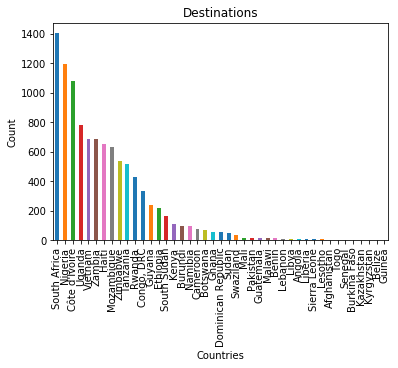

In [13]:
df_raw['country'].value_counts().plot(kind='bar' )
plt.title('Destinations')
plt.xlabel('Countries')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

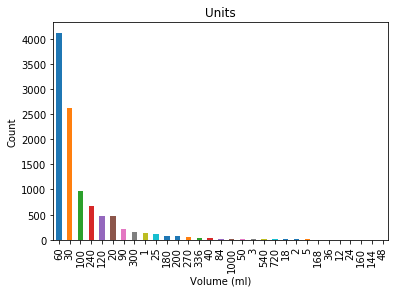

In [14]:
df_raw['unit of measure (per pack)'].value_counts().plot(kind='bar' )
plt.title('Units')
plt.xlabel('Volume (ml)')
plt.ylabel('Count')
sns.despine

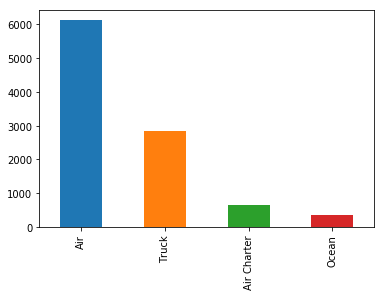

In [15]:
df_raw['shipment mode'].value_counts().plot(kind='bar')

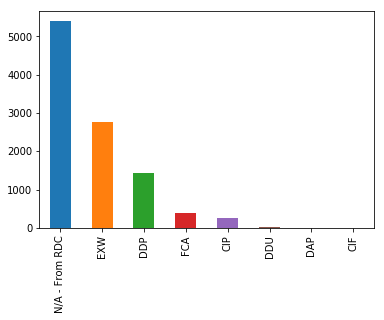

In [16]:
df_raw['vendor inco term'].value_counts().plot(kind='bar')

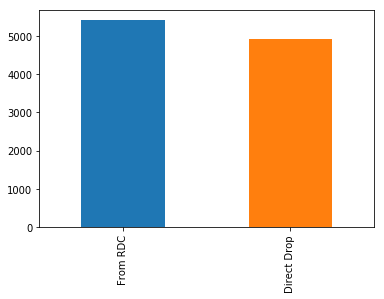

In [17]:
df_raw['fulfill via'].value_counts().plot(kind='bar')

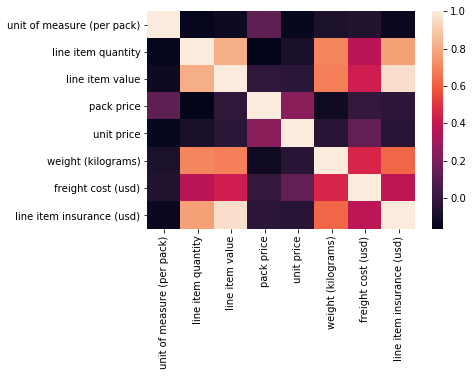

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [19]:
corr

,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd)
unit of measure (per pack),1.000000,-0.149323,-0.121997,0.120812,-0.141700,-0.077230,-0.054846,-0.126294
line item quantity,-0.149323,1.000000,0.818252,-0.161961,-0.084316,0.708330,0.373443,0.777468
line item value,-0.121997,0.818252,1.000000,-0.019623,-0.034486,0.690620,0.429410,0.961317
pack price,0.120812,-0.161961,-0.019623,1.000000,0.239447,-0.115613,-0.006048,-0.022548
unit price,-0.141700,-0.084316,-0.034486,0.239447,1.000000,-0.035361,0.137345,-0.038223
weight (kilograms),-0.077230,0.708330,0.690620,-0.115613,-0.035361,1.000000,0.464314,0.625407
freight cost (usd),-0.054846,0.373443,0.429410,-0.006048,0.137345,0.464314,1.000000,0.379495
line item insurance (usd),-0.126294,0.777468,0.961317,-0.022548,-0.038223,0.625407,0.379495,1.000000


Text(0.5, 1.0, 'Value vs Insurance')

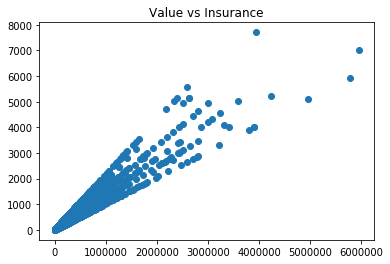

In [20]:
plt.scatter(df['line item value'],df['line item insurance (usd)'])
plt.title("Value vs Insurance")

Text(0.5, 1.0, 'Pack Price vs Freight')

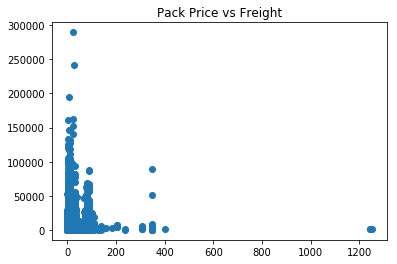

In [21]:
plt.scatter(df['pack price'],df['freight cost (usd)'])
plt.title("Pack Price vs Freight")

Text(0.5, 1.0, 'Quantity vs Freight')

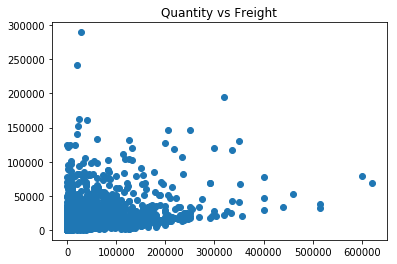

In [22]:
plt.scatter(df['line item quantity'],df['freight cost (usd)'])
plt.title("Quantity vs Freight")

Text(0.5, 1.0, 'Value vs Freight')

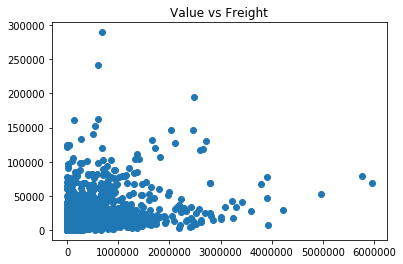

In [23]:
plt.scatter(df['line item value'],df['freight cost (usd)'])
plt.title("Value vs Freight")

Text(0.5, 1.0, 'Insurance vs Freight')

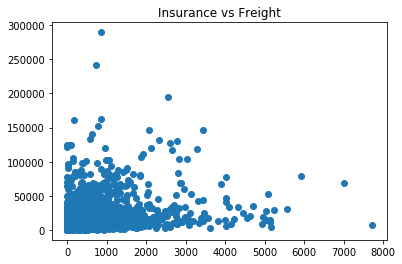

In [24]:
plt.scatter(df['line item insurance (usd)'],df['freight cost (usd)'])
plt.title("Insurance vs Freight")

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = np.array(df_country).reshape(-1,1)
enc.fit(X)
onehotlabels = enc.transform(X)
onehotlabels.toarray()


country_list = df.country.unique()
new_df = pd.DataFrame(data=onehotlabels,index = len(country_list) ,columns=country_list)
country_list[32]

In [25]:
country = pd.get_dummies(df['country'],prefix=['country'])
fulfillment = pd.get_dummies(df['fulfill via'],prefix=['fulfill'])
incoterm = pd.get_dummies(df['vendor inco term'],prefix=['incoterm'])
shipment_mode = pd.get_dummies(df['shipment mode'],prefix=['mode'])
product = pd.get_dummies(df['product group'],prefix=['product'])
classification = pd.get_dummies(df['sub classification'],prefix=['class'])
brand = pd.get_dummies(df['brand'],prefix=['brand'])

In [26]:
df = df.drop(['country',
'fulfill via',
'vendor inco term',
'shipment mode',
'product group',
'sub classification',
'brand'],axis = 1)

In [27]:
df_final = df.join([country,fulfillment, incoterm,shipment_mode,product, classification,brand])
df_final.shape

(5856, 111)

In [28]:
df_final

,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd),['country']_Afghanistan,['country']_Angola,...,['brand']_Stat-Pak,['brand']_Stocrin/Sustiva,['brand']_Trizivir,['brand']_Truvada,['brand']_Uni-Gold,['brand']_Videx,['brand']_Videx EC,['brand']_Viracept,['brand']_Viread,['brand']_Ziagen
19,100,1000,80000.00,80.00,0.80,341.0,2682.47,128.00,0,0,...,0,0,0,0,0,0,0,0,0,0
22,240,1000,1920.00,1.92,0.01,941.0,4193.49,3.07,0,0,...,0,0,0,0,0,0,0,0,0,0
23,120,500,41095.00,82.19,0.68,117.0,1767.38,65.75,0,0,...,0,0,0,0,0,0,0,0,0,0
24,100,750,53992.50,71.99,0.72,171.0,3518.38,86.39,0,0,...,0,0,0,0,0,0,0,0,0,0
25,100,25,8750.00,350.00,3.50,60.0,3097.85,14.00,0,0,...,0,0,0,0,0,0,0,0,0,0
26,25,10000,200000.00,20.00,0.80,3335.0,27869.74,320.00,0,0,...,0,0,0,0,0,0,0,0,0,0
27,25,10000,200000.00,20.00,0.80,3335.0,28461.10,320.00,0,0,...,0,0,0,0,0,0,0,0,0,0
28,25,10000,200000.00,20.00,0.80,3335.0,28359.80,320.00,0,0,...,0,0,0,0,0,0,0,0,0,0
29,60,64000,99200.00,1.55,0.03,4228.0,12237.61,158.72,0,0,...,0,0,0,0,0,0,0,0,0,0
30,20,10000,270000.00,27.00,1.35,3263.0,20885.78,432.00,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
df_final.describe()

,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd),['country']_Afghanistan,['country']_Angola,...,['brand']_Stat-Pak,['brand']_Stocrin/Sustiva,['brand']_Trizivir,['brand']_Truvada,['brand']_Uni-Gold,['brand']_Videx,['brand']_Videx EC,['brand']_Viracept,['brand']_Viread,['brand']_Ziagen
count,5856.000000,5856.000000,5.856000e+03,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,...,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000
mean,75.955430,22055.165642,1.961590e+05,23.879940,0.722176,3295.062329,11346.840558,297.841578,0.000342,0.001195,...,0.016906,0.004611,0.000854,0.009563,0.045936,0.005635,0.002049,0.000512,0.002220,0.002220
std,79.461844,43850.465668,3.801484e+05,46.546248,2.751195,7094.982165,16045.083885,556.959841,0.018479,0.034556,...,0.128929,0.067751,0.029210,0.097329,0.209364,0.074863,0.045225,0.022630,0.047068,0.047068
min,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1000.000000,1.037017e+04,4.300000,0.090000,216.750000,2205.147500,15.777500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,4997.500000,5.995570e+04,9.355000,0.160000,1098.000000,6037.085000,90.560000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100.000000,23040.000000,2.270781e+05,27.000000,0.660000,3397.500000,14629.425000,337.022500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,619999.000000,5.951990e+06,1250.000000,30.000000,154780.000000,289653.200000,7708.440000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# Labels are the values we want to predict
labels = np.array(df_final['freight cost (usd)'])

# Remove the labels from the features
# axis 1 refers to the columns
features= df_final.drop('freight cost (usd)', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [31]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [32]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (4392, 110)
Training Labels Shape: (4392,)
Testing Features Shape: (1464, 110)
Testing Labels Shape: (1464,)


In [33]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels);

In [34]:
rf.score(test_features,test_labels)

0.7135384768253411

In [35]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: weight (kilograms)   Importance: 0.46
Variable: unit price           Importance: 0.07
Variable: line item quantity   Importance: 0.05
Variable: line item value      Importance: 0.05
Variable: line item insurance (usd) Importance: 0.05
Variable: pack price           Importance: 0.04
Variable: ['mode']_Air         Importance: 0.03
Variable: ['product']_HRDT     Importance: 0.03
Variable: unit of measure (per pack) Importance: 0.02
Variable: ['country']_Cameroon Importance: 0.02
Variable: ['country']_Haiti    Importance: 0.02
Variable: ['country']_Rwanda   Importance: 0.02
Variable: ['country']_Uganda   Importance: 0.02
Variable: ['country']_Côte d'Ivoire Importance: 0.01
Variable: ['country']_Mozambique Importance: 0.01
Variable: ['country']_Nigeria  Importance: 0.01
Variable: ['country']_Tanzania Importance: 0.01
Variable: ['incoterm']_EXW     Importance: 0.01
Variable: ['mode']_Air Charter Importance: 0.01
Variable: ['mode']_Truck       Importance: 0.01
Variable: ['product']_

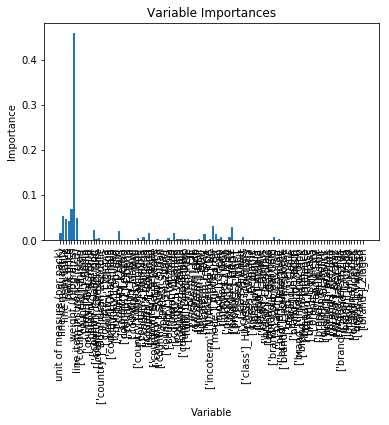

In [36]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');